<h1>RiskFolio analyse</h1>

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pycoingecko import CoinGeckoAPI
from scipy.optimize import minimize

<h1>Assets</h1>

In [2]:
assets = {
    'SPY': 'SP 500', 'VWRD.L': 'MSCI WORLD', '^FCHI': 'CAC 40', '^GDAXI': 'DAX 40', '^N225': 'NIKKEI 225',
    'BTC-USD': 'BTC', 'DOGE-USD': 'DOGE', 'ETH-USD': 'ETH', 'XRP-USD': 'XRP', 'ADA-USD': 'ADA', 'BNB-USD': 'BNB',
    'GC=F': 'GOLD', 'SI=F': 'SILVER',
    'BND': 'US BOND','IXUS': 'WORLD EX-US','TLT': 'US TREASURY', 'VWO': 'EMERGING MARKETS','BNDX': 'WORLD BOND', 
    'VYM': 'HIGH DIVIDEND', 'VNQ': 'REAL ESTATE',
}

assets_saxobank = {
    # 'ZM': 'Zoom',
    'UBS': 'UBS',
    'KO': 'Coca Cola',
    'TSLA': 'Tesla',
    'ALVMG.PA': 'Visiomed',
    'UHRN.SW': 'Swatch Group',
    'NVDA': 'NVidia',
    # 'PLTR': 'Palantir',
    'MSFT': 'Microsoft',
    'META': 'Meta',
    # 'COIN': 'Coinbase',
    'AAPL': 'Apple',
    'AMZN': 'Amazon',
    'CDR.WA': 'CD Projekt',
}

assets_cryptos_jack = {
    'BTC-USD': 'BTC', 'ETH-USD': 'ETH', 'BNB-USD': 'BNB', 'DOGE-USD': 'DOGE', 'XRP-USD': 'XRP', 'ADA-USD': 'ADA', 'LINK-USD': 'LINK',
    'SOL-USD': 'SOL', 'FET-USD': 'FET', 'ATOM-USD': 'ATOM', 'XMR-USD': 'XMR', 'DOT-USD': 'DOT', 'FTM-USD': 'FTM', 'ADA-USD': 'ADA',
    'NEAR-USD': 'NEAR', 'AAVE-USD': 'AAVE', 'MATIC-USD': 'MATIC', 'BCH-USD': 'BCH', 'CHSB-USD': 'CHSB', 'LTC-USD': 'LTC', 'OCEAN-USD': 'OCEAN',
    'AVAX-USD': 'AVAX', 'XTZ-USD': 'XTZ', 'VET-USD': 'VET', 'TRX-USD': 'TRX', 'UNI-USD': 'UNI', 'XLM-USD': 'XLM', 'CRO-USD': 'CRO',
    'LDO-USD': 'LDO', 'GRT-USD': 'GRT', 'FTM-USD': 'FTM', 
}

# data = yf.download(list(assets.keys()), start='2018-01-01', end='2024-06-23', period='1d')['Adj Close']
# data.rename(columns=assets, inplace=True)
# returns = data[assets.values()].pct_change().dropna()

# data = yf.download(list(assets_saxobank.keys()), start='2018-01-01', end='2024-06-23', period='1d')['Adj Close']
# data.rename(columns=assets_saxobank, inplace=True)
# returns = data[assets_saxobank.values()].pct_change().dropna()

data = yf.download(list(assets_cryptos_jack.keys()), start='2018-01-01', end='2024-06-23', period='1d')['Adj Close']
data.rename(columns=assets_cryptos_jack, inplace=True)
returns = data[assets_cryptos_jack.values()].pct_change().dropna()

returns

[*********************100%%**********************]  29 of 29 completed
C:\Users\jacks\AppData\Local\Temp\ipykernel_20252\1445870280.py:44: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data[assets_cryptos_jack.values()].pct_change().dropna()


Ticker,BTC,ETH,BNB,DOGE,XRP,ADA,LINK,SOL,FET,ATOM,...,OCEAN,AVAX,XTZ,VET,TRX,UNI,XLM,CRO,LDO,GRT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-06,0.083311,0.097369,0.010336,0.054939,0.106483,0.284863,0.179877,-0.105692,0.176195,0.074583,...,-0.005331,0.090372,0.099838,0.103372,0.065766,-0.637255,0.749244,0.158000,-0.002951,0.099784
2021-01-07,0.069157,0.015380,0.030440,-0.069087,0.299356,-0.096168,-0.065478,0.229901,-0.027992,-0.060694,...,-0.046097,-0.031111,-0.031823,-0.067870,0.018122,0.063063,-0.073347,0.012807,-0.192965,0.012712
2021-01-08,0.036234,-0.001208,-0.024262,0.010675,-0.008503,0.018725,-0.046400,0.357030,0.009548,-0.051566,...,-0.025457,0.294977,-0.029170,-0.044698,-0.014645,0.033898,-0.041042,0.049682,0.059343,0.000136
2021-01-09,-0.013311,0.046463,0.036267,0.035344,0.011404,0.089582,0.151715,0.051398,0.015428,0.098791,...,0.100753,0.245195,0.073620,0.055724,0.111489,1.639344,0.030046,0.014373,-0.437210,0.046007
2021-01-10,-0.047153,-0.014699,-0.033787,-0.032764,-0.026245,-0.084325,-0.077244,0.023846,-0.037076,-0.016722,...,-0.047817,-0.087557,0.049361,-0.060831,-0.032064,0.071429,-0.074330,-0.060443,0.176852,-0.014477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,-0.020297,-0.007888,-0.026081,-0.051153,-0.028134,-0.045246,-0.038987,-0.040676,-0.093666,-0.042713,...,-0.086287,-0.065354,-0.011981,-0.065644,-0.012140,-0.022556,-0.057165,-0.015758,0.102932,0.000000
2024-06-19,-0.002770,0.021720,0.017105,0.000368,0.004671,0.000550,0.026273,-0.013777,0.257999,0.027999,...,0.221733,0.010259,0.030380,0.015161,0.003493,0.000000,0.021155,0.008339,0.065631,0.000000
2024-06-20,-0.002026,-0.013559,-0.019481,0.016985,-0.009174,0.001180,-0.005272,-0.015756,0.065348,-0.007268,...,0.044539,0.024263,0.003202,0.028483,0.007919,0.000000,0.006516,0.001291,-0.006638,0.000000


# Stratégies

w3 optimization successful


,BTC,ETH,BNB,DOGE,XRP,ADA,LINK,SOL,FET,ATOM,...,OCEAN,AVAX,XTZ,VET,TRX,UNI,XLM,CRO,LDO,GRT
weights,0.000003,1.525943e-09,2.386453e-09,23.12473,5.426247e-10,1.570630e-09,1.800683e-09,7.570486,2.331154,1.978532e-09,...,1.665417e-09,1.214611e-09,1.805304e-09,1.885667e-09,7.681896e-09,63.419091,2.293855e-09,1.594880e-09,6.244424e-07,0.000002


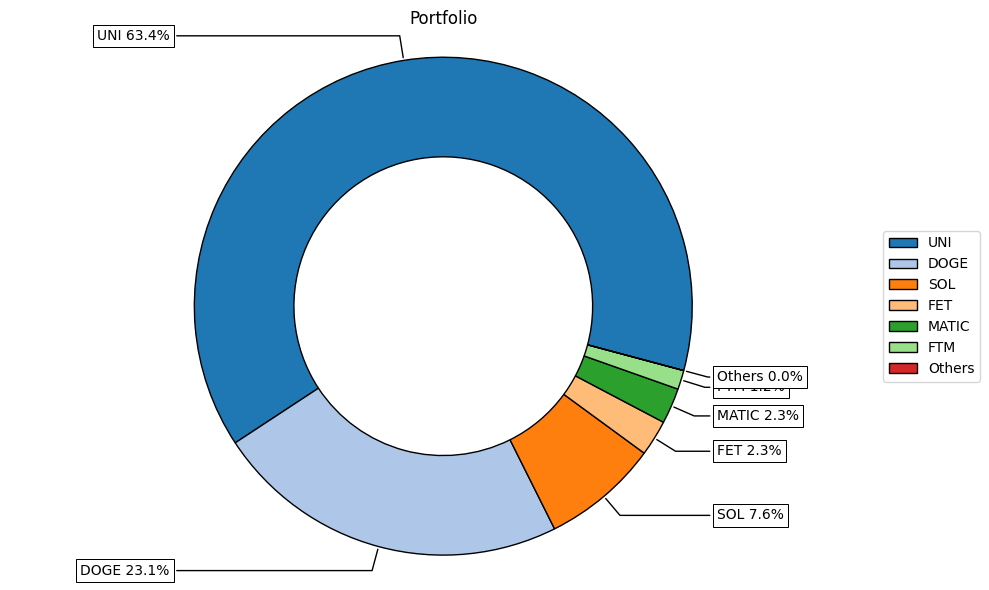

In [122]:
rm = 'CVaR'
obj = 'Sharpe'  # Sharpe, MinRisk, MaxRet
rf = 0
alpha = 0.05
codependence = 'kendall'
linkage = 'ward'

port = rp.Portfolio(returns=returns)
hc_port = rp.HCPortfolio(returns=returns)

# Contraintes
port.uppermdd = 0.6
port.lowerret = 0.9/365

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

# w1: classic sharpe optimization
w1 = port.optimization(model='Classic', rm=rm, obj=obj, rf=rf, l=0, hist=True) 

# w2: risk parity optimization (equal risk contribution)
# A essayer pour les poids des cryptos dans la stratégie multi_envelope
w2 = port.rp_optimization(model='Classic', rm=rm, rf=rf, b=None, hist=True)

# w3: Nested Clustered Optimization
try:
    w3 = hc_port.optimization(
        model='NCO',
        codependence=codependence, 
        obj=obj, 
        rm=rm, 
        rf=rf, 
        linkage=linkage,
        alpha=alpha,
    )
    print("w3 optimization successful")
except Exception as e:
    print(f"Error in w3 optimization: {e}")

ws = port.efficient_frontier(model='Classic', rm=rm, points=30, rf=rf, hist=True)

w = w3      # Choix de la stratégie

display(w.T*100)
ax = rp.plot_pie(w=w, title='Portfolio', others=0.01, nrow=25, cmap = "tab20", height=6, width=10, ax=None)

<h1>Analyses</h1>

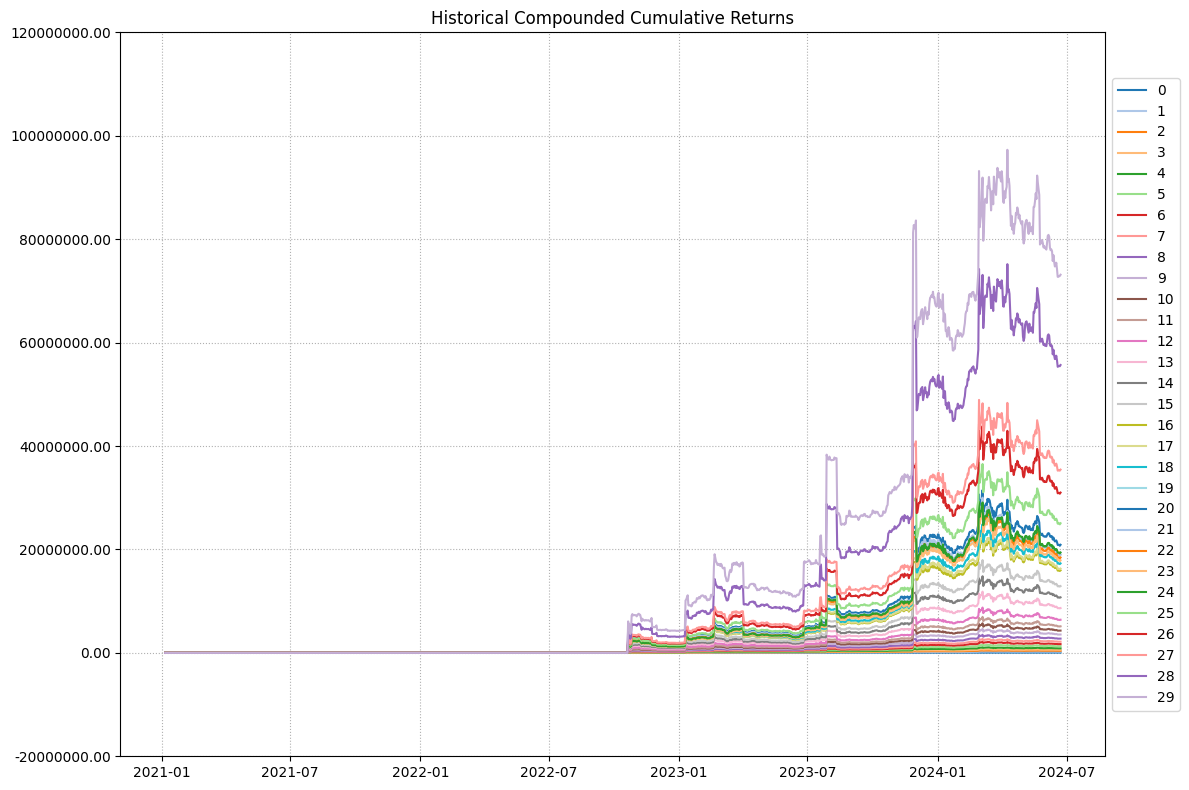

In [123]:
ax = rp.plot_series(returns=returns, w=ws, cmap='tab20', height=8, width=12, ax=None)

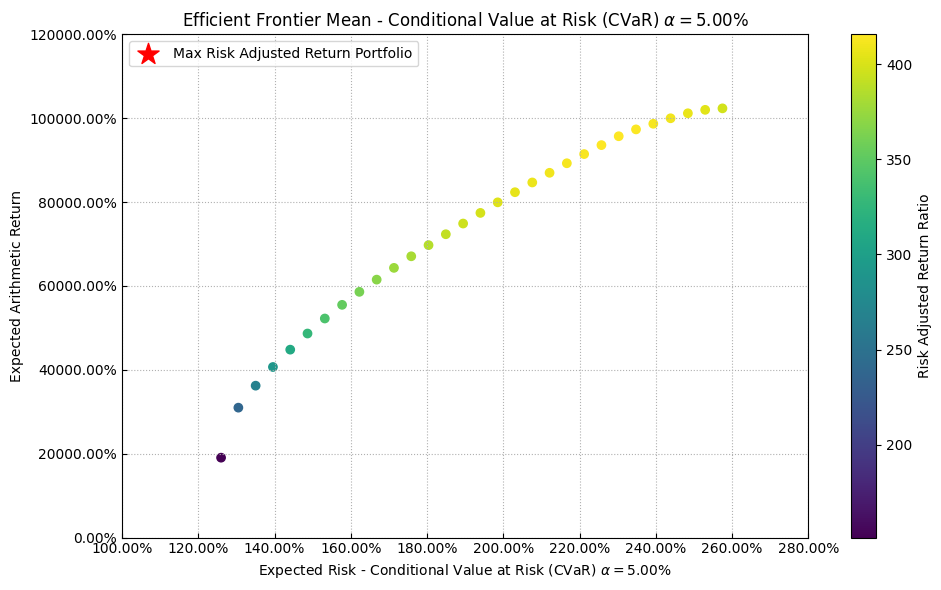

In [124]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=alpha, cmap='viridis', w=w, label=label, marker='*',
                      s=16, c='r', height=6, width=10, t_factor=252, ax=None)

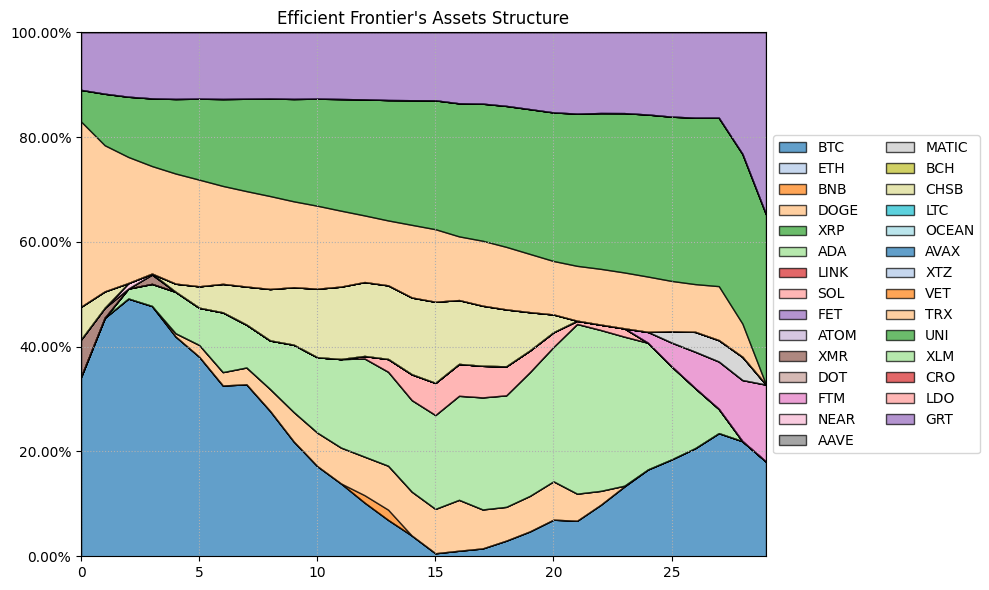

In [125]:
ax = rp.plot_frontier_area(w_frontier=ws, cmap="tab20", height=6, width=10, ax=None)

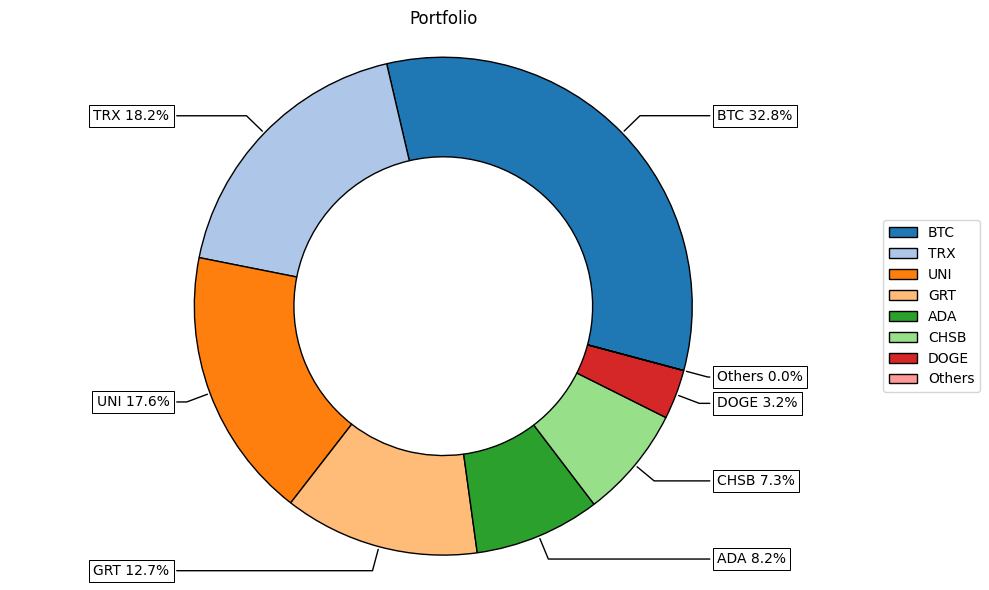

In [126]:
#Choix du risque (point de la frontière efficiente)
new_w = pd.DataFrame(ws[7])
ax = rp.plot_pie(w=new_w, title='Portfolio', others=0.01, nrow=25, cmap = "tab20", height=6, width=10, ax=None)

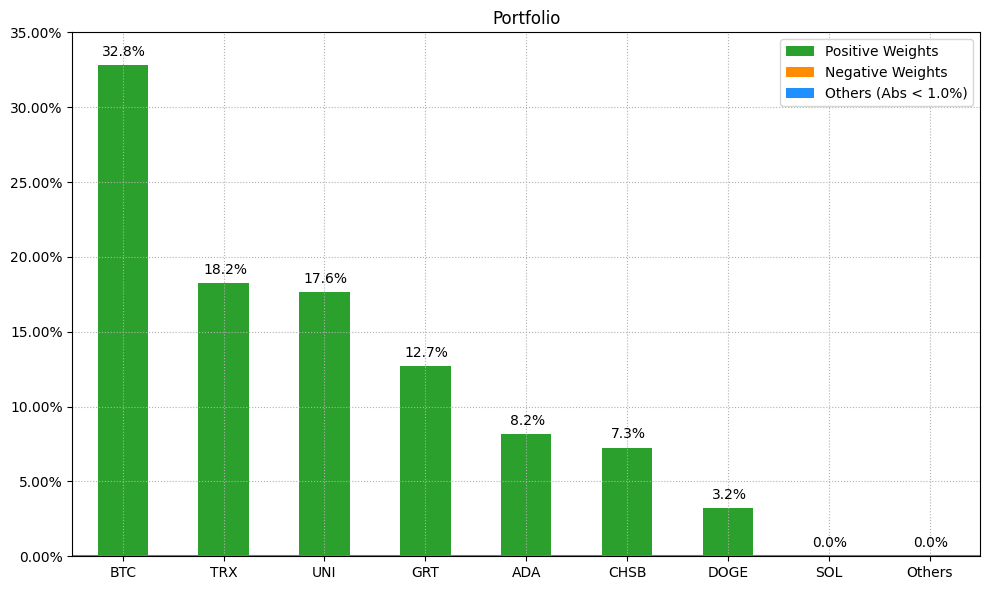

In [127]:
ax = rp.plot_bar(w=new_w, title='Portfolio', kind="v", others=0.05, nrow=25, height=6, width=10, ax=None)

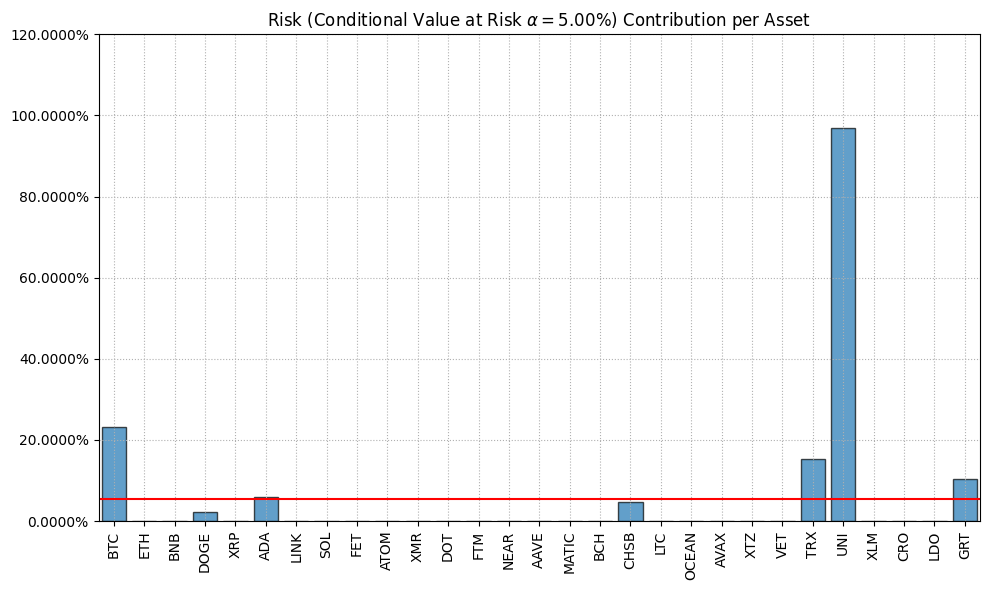

In [128]:
ax = rp.plot_risk_con(w=new_w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=rf,
                      alpha=alpha,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

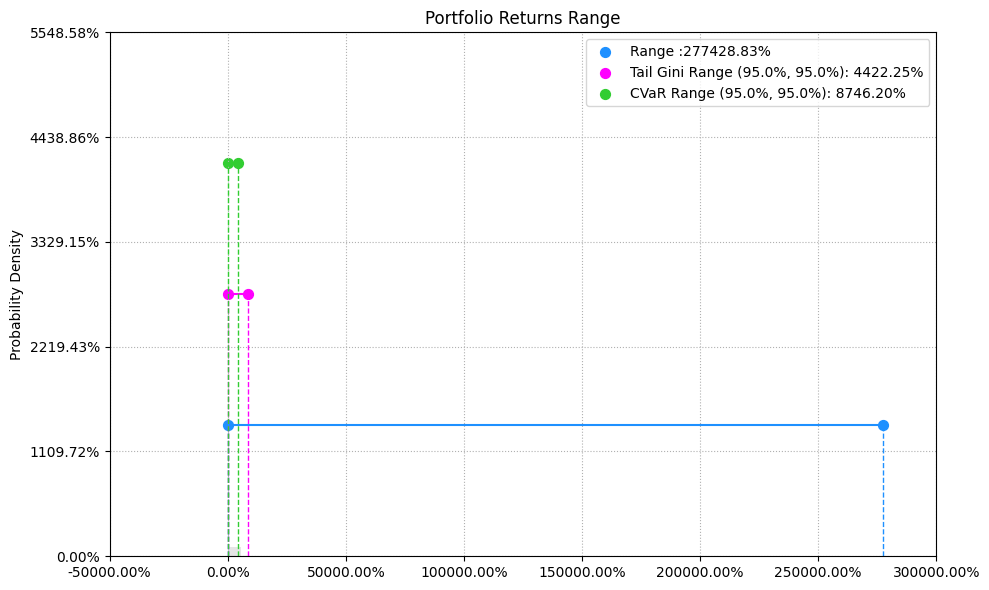

In [129]:
ax = rp.plot_range(returns=returns,
                w=new_w,
                alpha=alpha,
                a_sim=100,
                beta=None,
                b_sim=None,
                bins=50,
                height=6,
                width=10,
                ax=None)

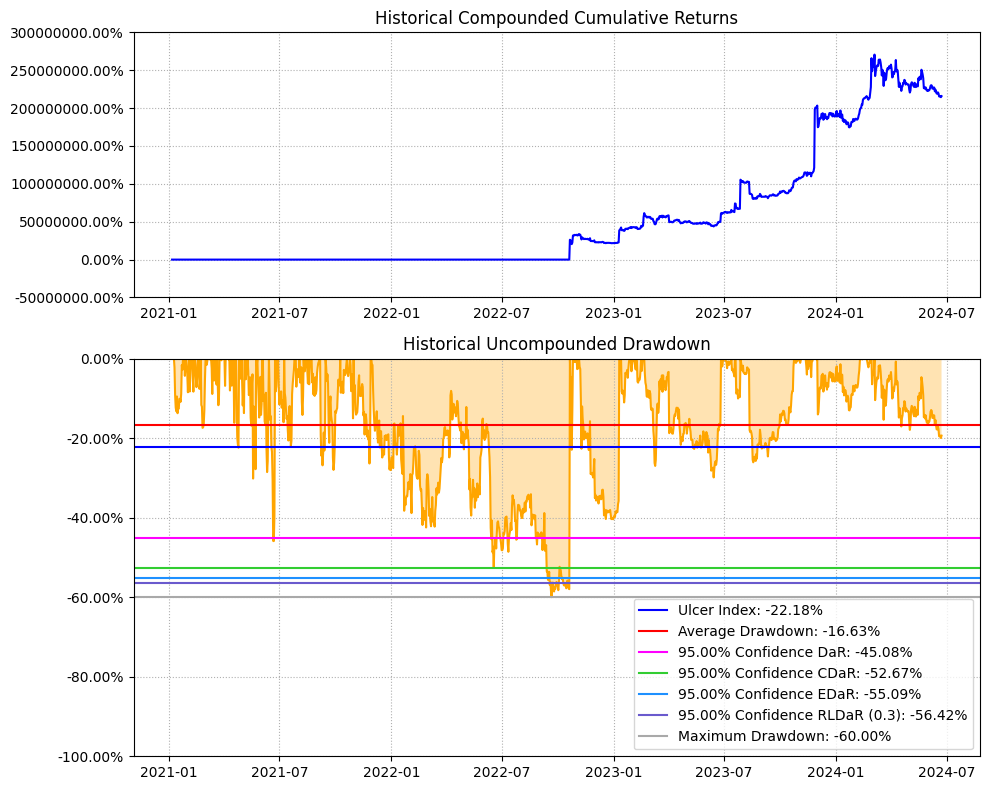

In [130]:
ax = rp.plot_drawdown(returns=returns, w=new_w, alpha=alpha, height=8, width=10, ax=None)

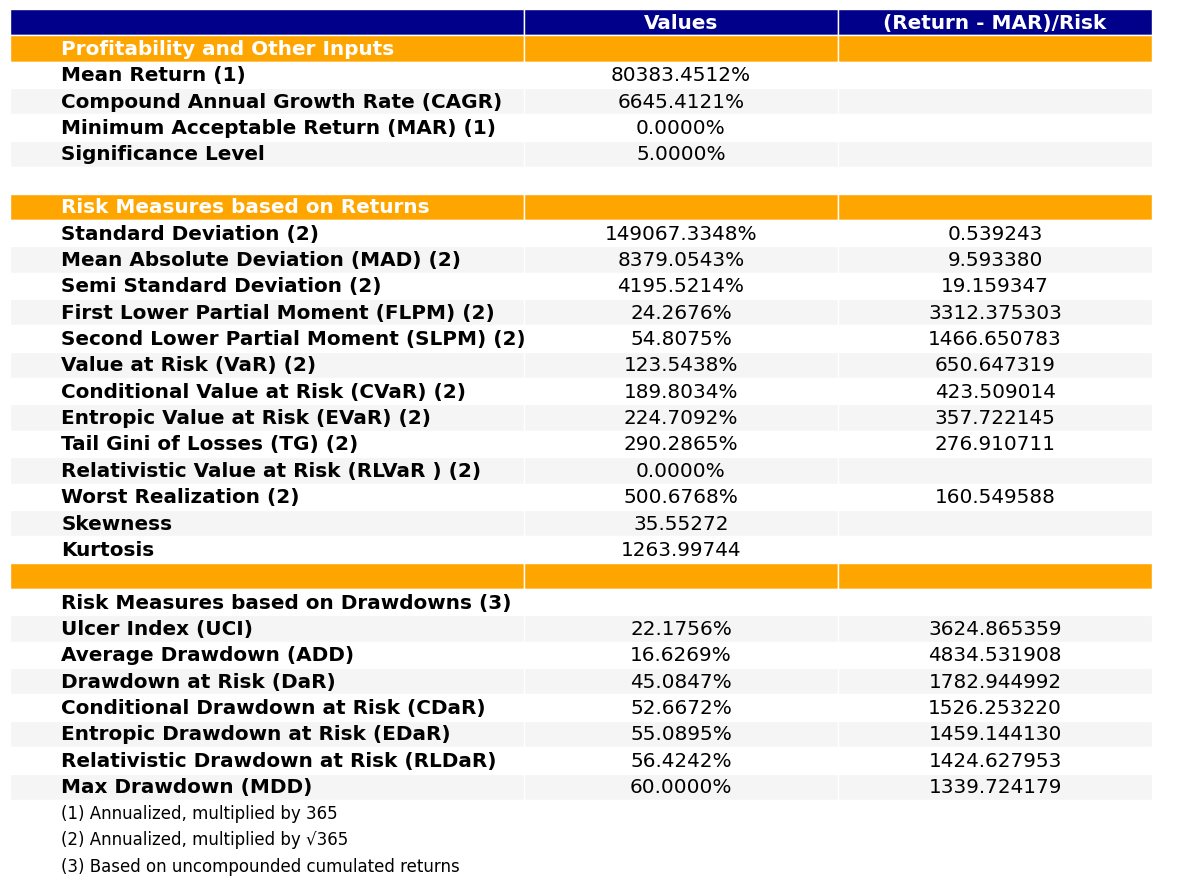

In [131]:
ax = rp.plot_table(returns=returns, w=new_w, MAR=0, alpha=alpha, t_factor=365, days_per_year=365)

In [132]:
# Risk Measures available:
#
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'CDaR', 'EDaR', 'UCI']

w_s = pd.DataFrame([])

for i in rms:
    w = hc_port.optimization(
        model='NCO',
        codependence=codependence, 
        obj=obj, 
        rm=rm, 
        rf=rf, 
        linkage=linkage,
        alpha=alpha,)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,EDaR,UCI
BTC,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ETH,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BNB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DOGE,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%,23.12%
XRP,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ADA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
LINK,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
SOL,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%,7.57%
FET,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%,2.33%
ATOM,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


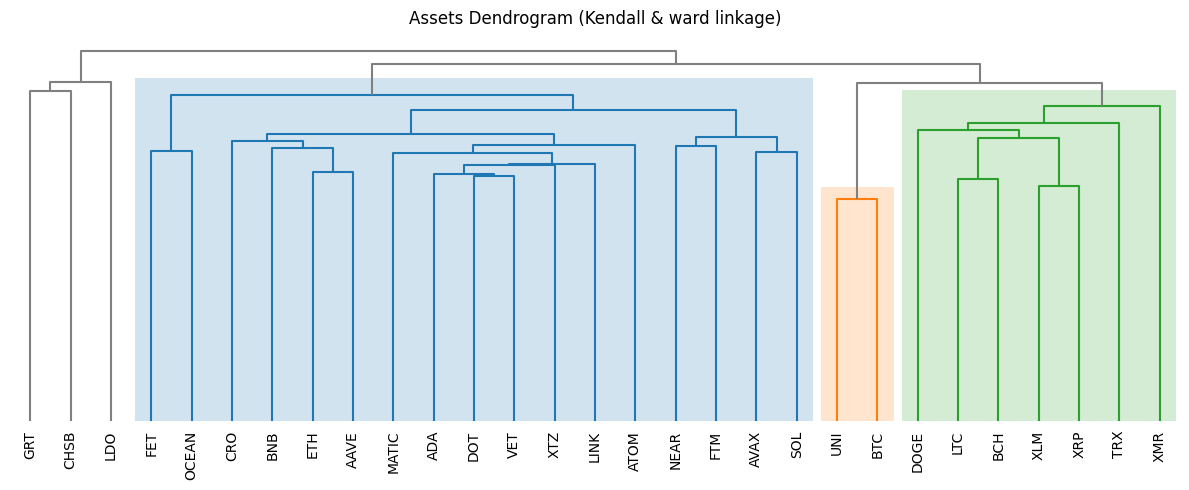

In [133]:
ax = rp.plot_dendrogram(returns=returns,
                        codependence=codependence,
                        linkage=linkage,
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

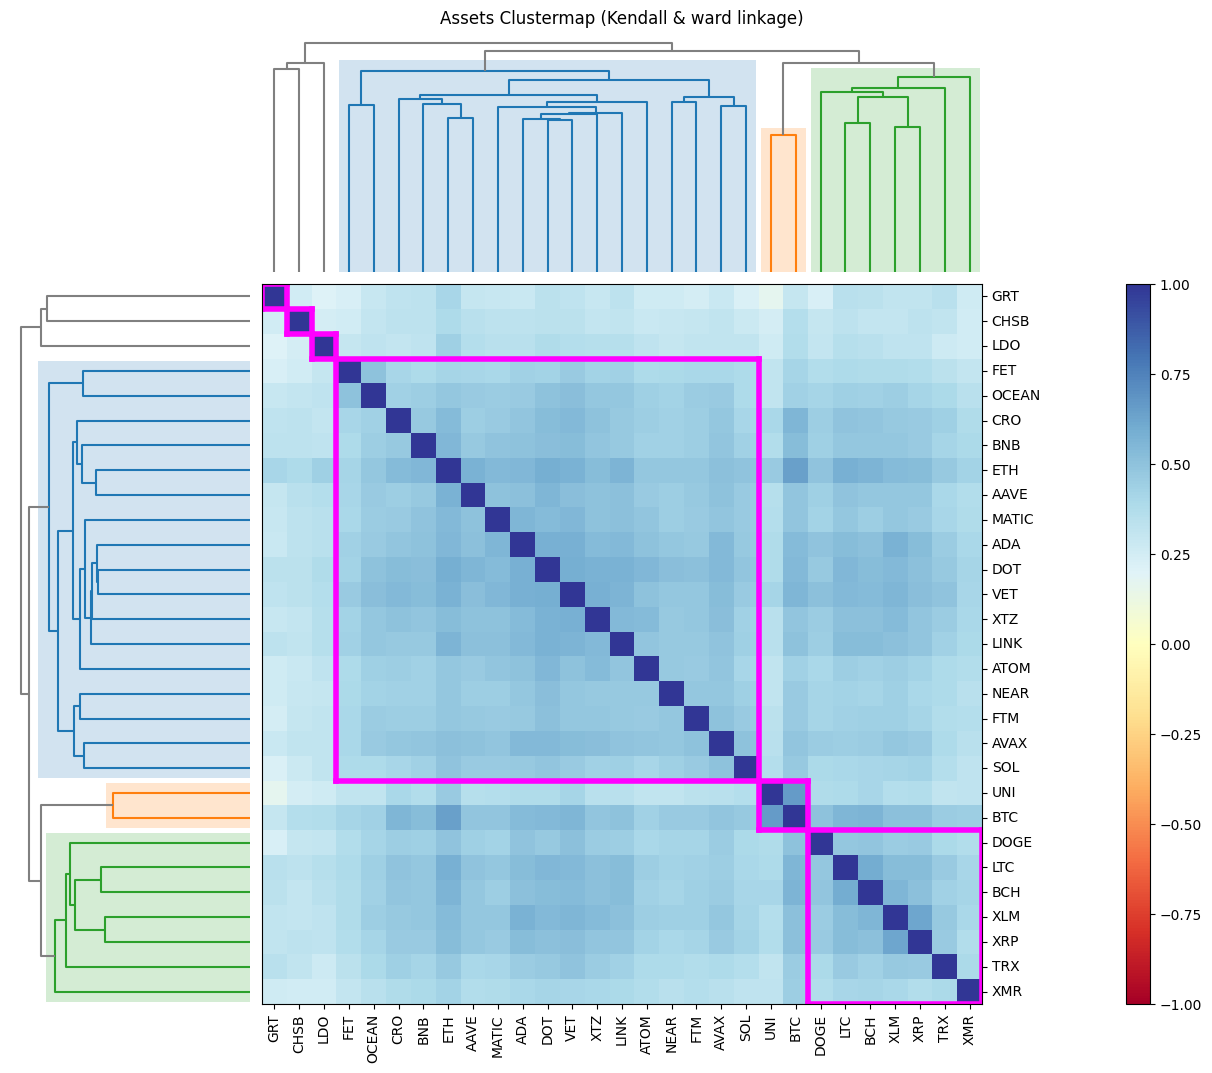

In [134]:
ax = rp.plot_clusters(returns=returns,
                      codependence=codependence,
                      linkage=linkage,
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

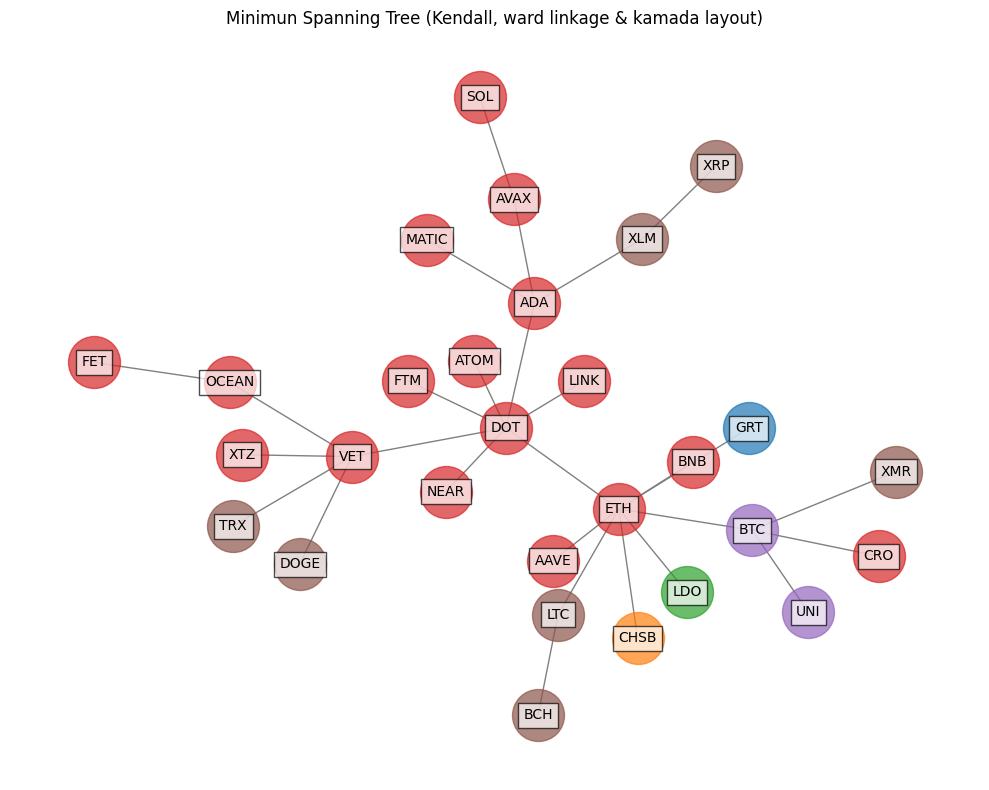

In [135]:
ax = rp.plot_network(returns=returns,
                     codependence=codependence,
                     linkage=linkage,
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='kamada',
                     ax=None)

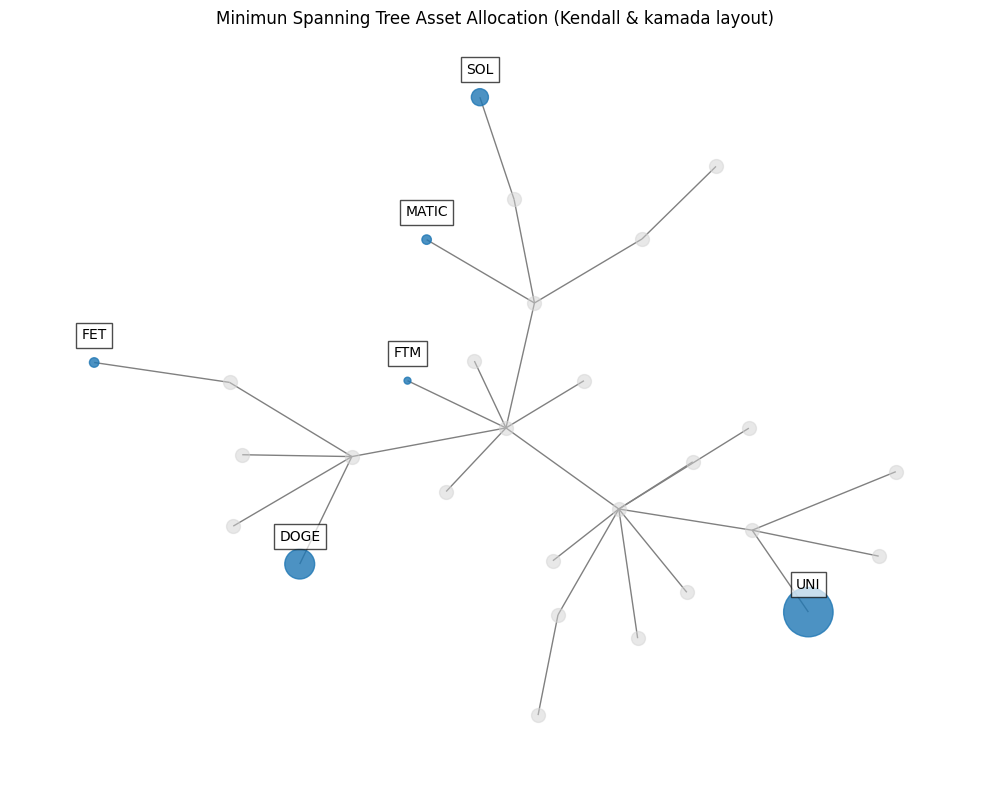

In [136]:
ax = rp.plot_network_allocation(returns=returns,
                                w=w,
                                codependence=codependence,
                                linkage=linkage,
                                alpha_tail=0.05,
                                leaf_order=True,
                                kind='kamada',
                                ax=None)